In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# AM6020 Assignment 2

## Submission

This assignment must be **your own work**. Remember the Plagarism Policy that you agreed to (near the top of the AM6020 Modules page on Canvas).

Please submit your assignment electronically:
- Save the notebook (*studentID*_A2.ipynb).
- Upload the notebook to the Assignment 2 submission on Canvas.

**If you submit this assignment in late or to the wrong location, a mark of zero will be recorded unless you make a case for mitigation by submitting supporting documentation (e.g. medical certificates) to the School of Mathematical Sciences Office <sms@ucc.ie>.**


*Note: When solving the tasks below, you can look up further methods and functions, not necessarily covered in the AM6020 lectures, but only methods and functions from the standard library or those modules we covered. In other words, for this assignment you should only ever import math, random, NumPy and/or Matplotlib.*

## Part 1: Plotting data (7 marks)

The data file *energy_data.csv* contains a breakdown of energy sources being used in Ireland from 1990-2018. It can be downloaded from the Assigment 2 page on Canvas.

Read this data into a numpy array and plot the year usage of each fuel type, all on the same axes (i.e. in the one figure). Include a legend to make it easy to see what curve corresponds to what fuel type.

Text(0, 0.5, 'Usage (GWh)')

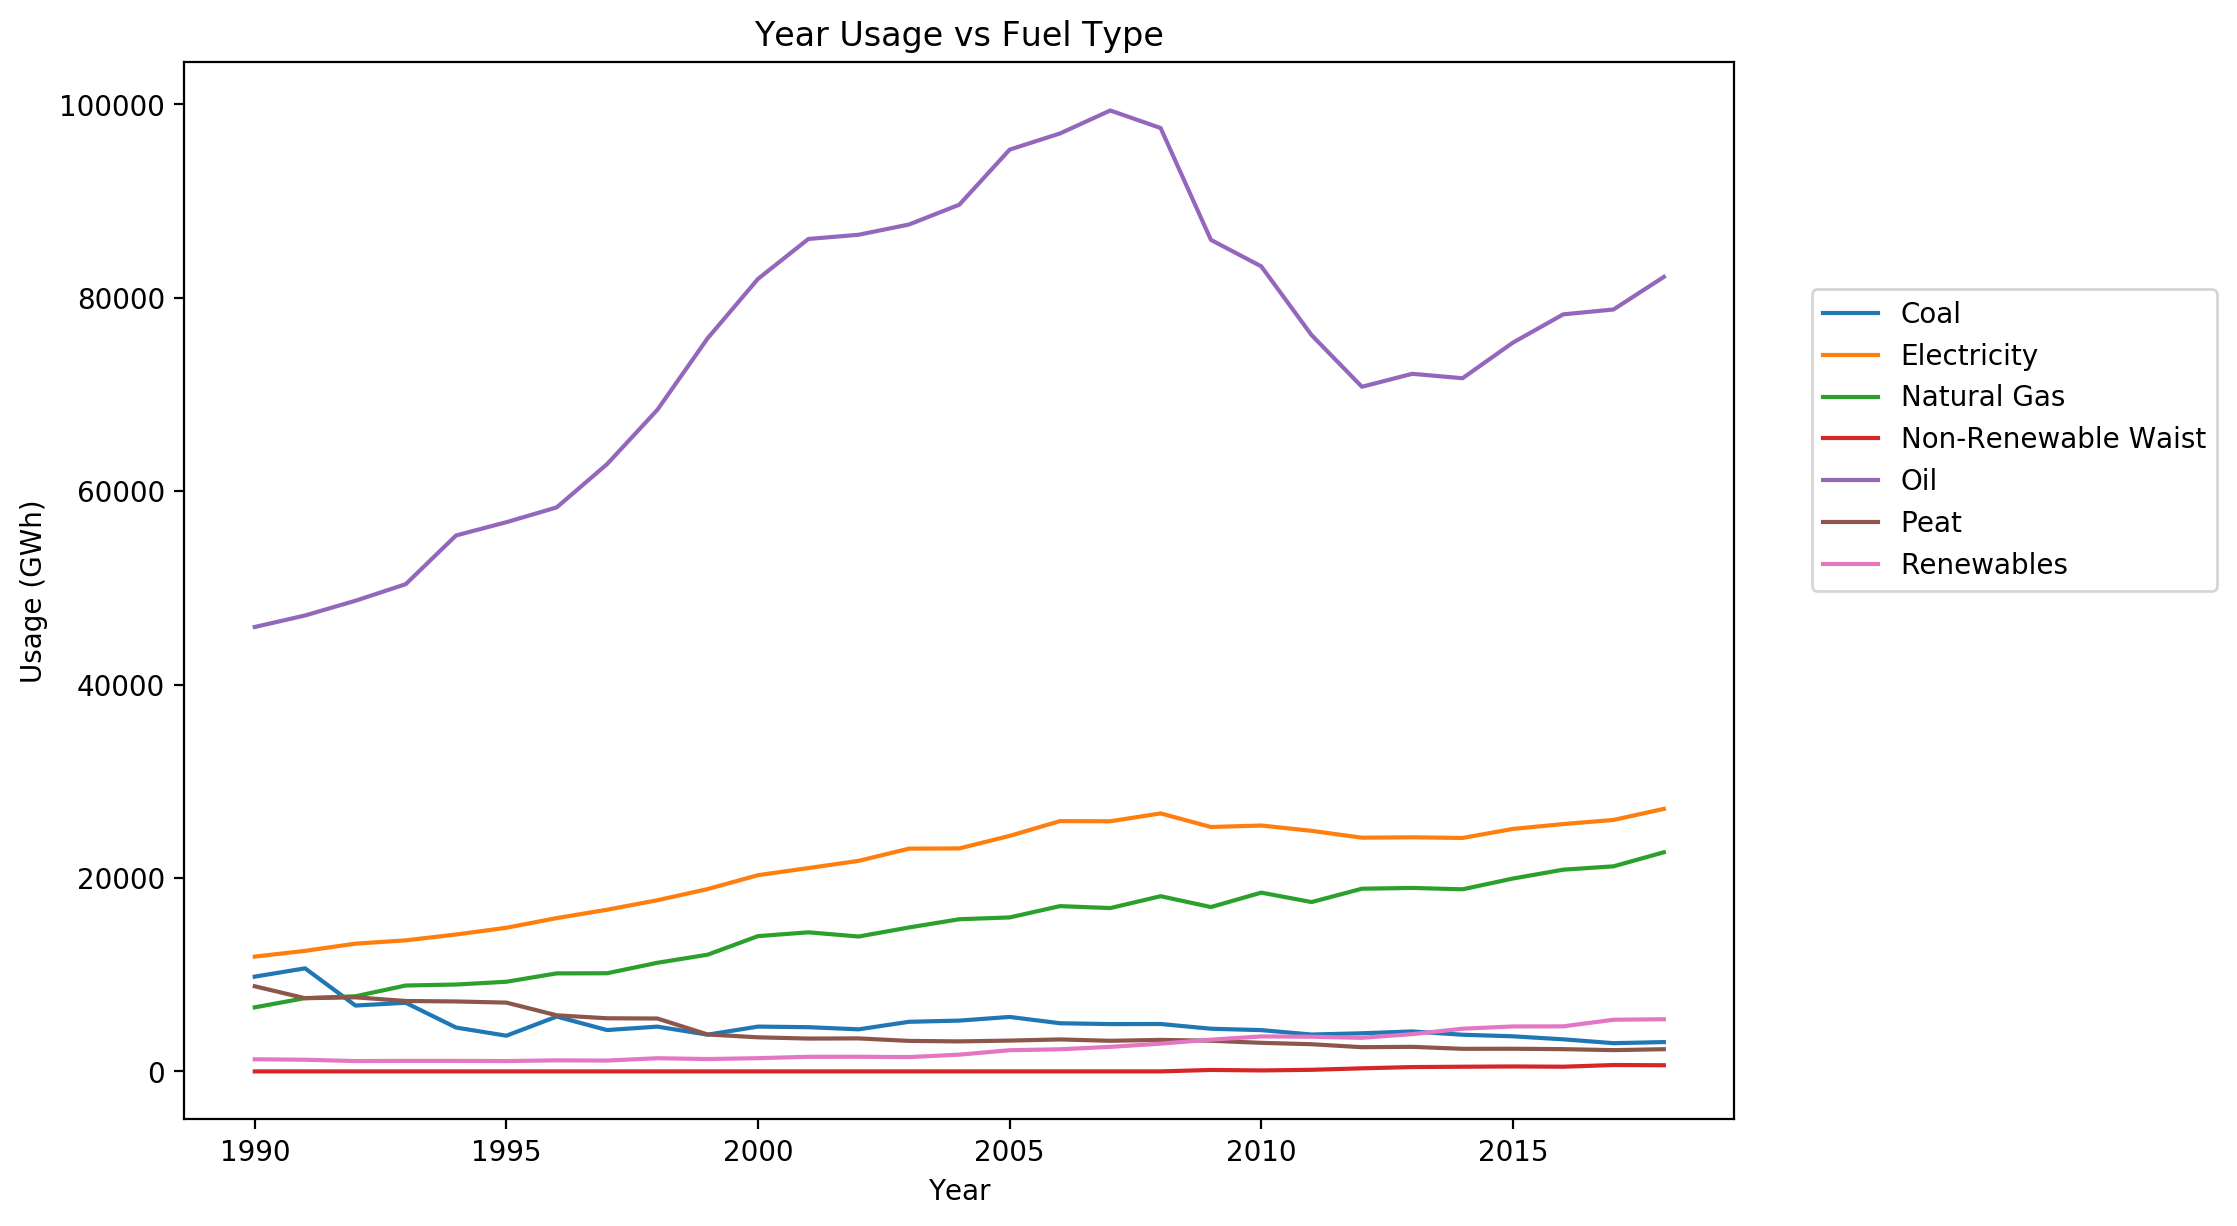

In [36]:
# reading the data into a numpy array, 
energy_data =  np.genfromtxt("energy_data.csv", delimiter=",", skip_header=2)

# assign the names to each column of data 
Year, Coal, Electricity, Natural_Gas, NonRenewable_waist, Oil, Peat, Renewables = energy_data.T 

# plot year against each fuel type on same plot
plt.figure(figsize=(10,7),dpi=200)
plt.plot(Year, Coal, Year, Electricity, Year, Natural_Gas, Year, 
         NonRenewable_waist, Year, Oil, Year, Peat, Year, Renewables)
plt.title("Year Usage vs Fuel Type")
plt.legend(("Coal", "Electricity", "Natural Gas", "Non-Renewable Waist", "Oil", "Peat", "Renewables"), loc=(1.05, 0.5)) 
plt.xlabel('Year')
plt.ylabel('Usage (GWh)')

Plot the total year energy consumption; that is, usage of all the fuel types together for *each year*.

Text(0, 0.5, 'Usage (GWh)')

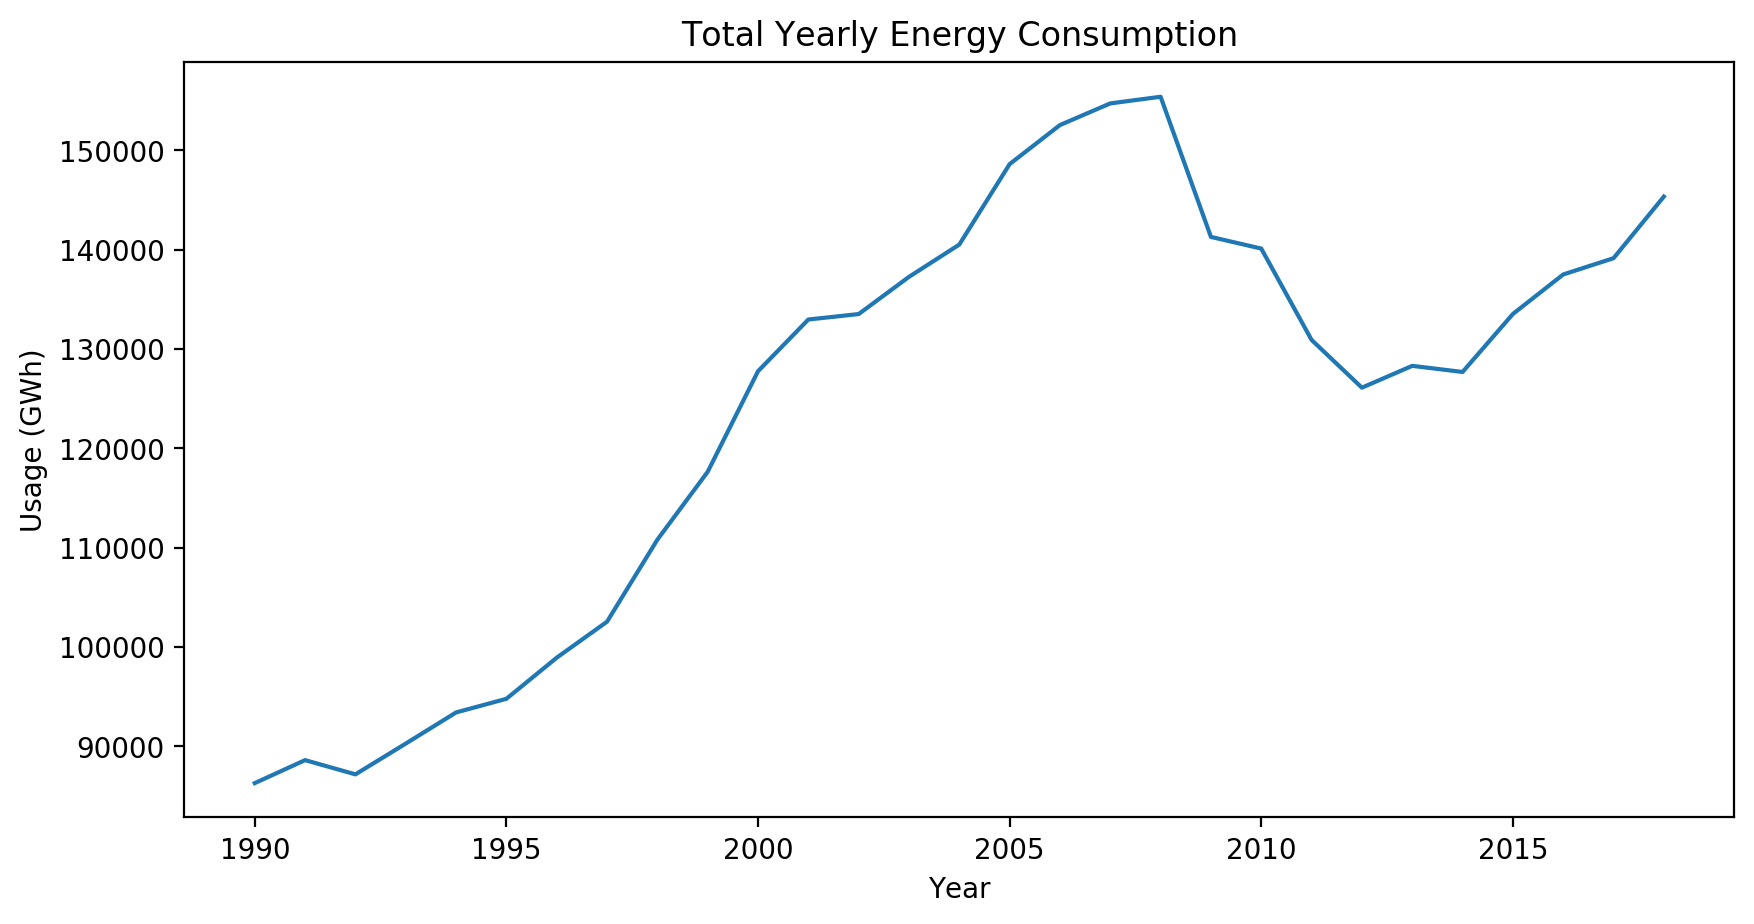

In [34]:
# total energy usage for each year 
total = energy_data.sum(axis = 1)

plt.figure(figsize=(10,5),dpi=200)
plt.plot(Year, total)
plt.title("Total Yearly Energy Consumption")
plt.xlabel('Year')
plt.ylabel('Usage (GWh)')

Now create a stackplot to represent the data.

How do you make a stackplot? Good question. As we did in Lecture 7, visit the [Matplotlib gallery](https://matplotlib.org/stable/gallery/index.html) and find an example of a stackplot. Adapt the code you find there for the present data.

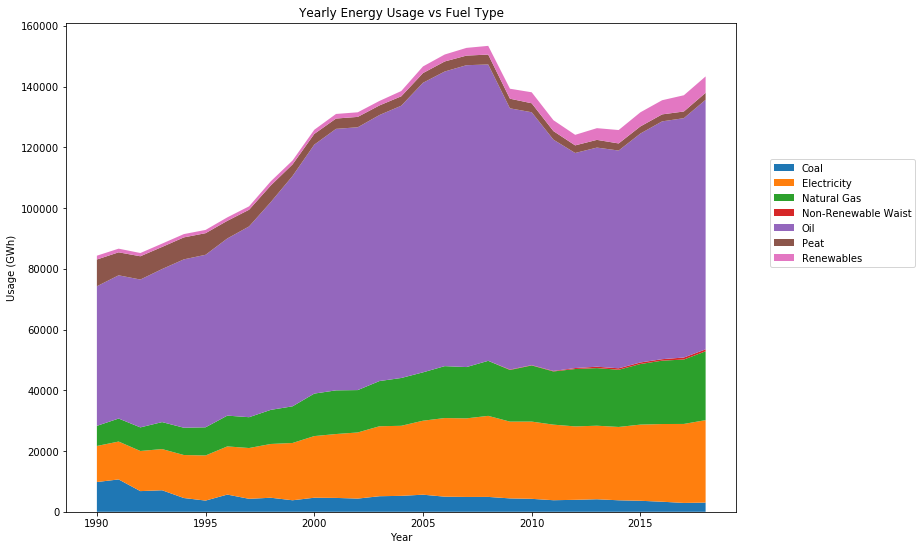

In [22]:
# dictionary containing each fuel type name as key and each fuel type usage data as values
fuel_dict = {"Coal": Coal, "Electricity":Electricity, "Natural Gas":Natural_Gas, "Non-Renewable Waist": NonRenewable_waist,
             "Oil": Oil, "Peat":Peat, "Renewables":Renewables}


fig, ax = plt.subplots(figsize = (12,9))
ax.stackplot(Year, fuel_dict.values(),
            labels = fuel_dict.keys())
ax.legend(loc=(1.05, 0.5)) 
ax.set_title('Yearly Energy Usage vs Fuel Type')
ax.set_xlabel('Year')
ax.set_ylabel('Usage (GWh)')
plt.show()

## Part 2: Dictionary (4 marks)

Below is a dictionary that summarises the stock at a certain supermarket. Notice how the values of this dictionary are dictionaries themselves.

In [39]:
supermarket = { "milk": {"quantity": 20, "price": 1.19},
               "biscuits":  {"quantity": 32, "price": 1.45},
               "butter":  {"quantity": 20, "price": 2.29},
               "cheese":  {"quantity": 15, "price": 1.90},
               "bread":  {"quantity": 15, "price": 2.59},
               "cookies":  {"quantity": 20, "price": 4.99},
               "yoghurt": {"quantity": 18, "price": 3.65},
               "apples":  {"quantity": 35, "price": 3.15},
               "oranges":  {"quantity": 40, "price": 0.99},
               "bananas": {"quantity": 23, "price": 1.29}}

Write a function to return the total cost if you were to purchase everything in the supermarket.

In [40]:
def total_cost1(stock_dict): # function with hard coded keys
    
    total_sum = 0
    
    for stock, details in stock_dict.items():
        result = stock_dict[stock]['quantity'] * stock_dict[stock]['price']  # quantity X price of the specific item
        total_sum += result
    
    return total_sum

def total_cost2(stock_dict): # function that is reproducible no matter what the keys may be called
    
    total_sum = 0
    key_list = []
    
    for stock, diction in stock_dict.items():
        for key in diction.keys():
            if key not in key_list:
                key_list.append(key)
    
        result = stock_dict[stock][key_list[0]] * stock_dict[stock][key_list[1]]
            
        total_sum += result
    
    return total_sum


In [46]:
print(total_cost1(supermarket))
print(total_cost2(supermarket))

528.37
528.37


Now imagine that there are five people who all want to buy supplies from this supermarket. Create a function that will return a total cost for each supermarket customer. 

Below are their shopping lists (or rather shopping dictionaries).

In [47]:
Betty = {'bananas' : 6, 'yoghurt': 4, 'bread': 1, 'cheese': 2, 'milk': 2}
John = {'apples': 7, 'bananas': 7, 'oranges': 10}
Samantha = {'milk': 3, 'bread': 2, 'butter': 2, 'cheese': 3, 'yoghurt':5, 'apples': 10, 'bananas': 10}
Gerald = {'cookies': 20, 'milk': 2}

Let the input to the function be a single dictionary that contains the above four shopping dictionaries as dictionary values. Let the output (i.e. the total cost for each customer) also be a dictionary.

In [64]:
# Define your function here. 

def cost_per_customer(shopping_lists, supermarket): 
    
    # dictionary of shopping list dictionaries
    # supermarket dictionary with price details of each item
    
    total_cost = {} 
    
    for key, value in shopping_lists.items():
        
        cust_cost = 0
          
        for item, quantity in shopping_lists[key].items():  # e.g. shopping_lists['Betty']
            
            # multiply quantity of each item by the price specified in the supermarket dictionary
            
            cost = quantity * supermarket[item]['price']    
            
            cust_cost += cost # add the cost of each item for that customer to cust_cost 
    
        total_cost[key] = cust_cost # add the name of customer and total cost to the empty dictionary

    return total_cost

In [65]:
# Call your function here

shopping_lists = {'Betty': Betty, 'John': John, 'Samantha':Samantha, 'Gerald': Gerald}

shopping_totals = cost_per_customer(shopping_lists, supermarket)

print(shopping_totals)

{'Betty': 31.11, 'John': 40.980000000000004, 'Samantha': 81.68, 'Gerald': 102.18}


## Part 3: Blurring images (8 marks)

Write your own code to apply a *mean blur* to an image by kernel convolution. In other words, do not use openCV.

Apply your code to the grayscale image *cactus.jpg* to be downloaded from the Assignment 2 page on Canvas.

To start, only use a $3\times 3$ kernel.

Plot both the original and the blurred image side-by-side. Do you notice much of a difference?

In [57]:
# may need increased data rate limit to run 

# code here is explained within the function below for using n x n kernel size

img = plt.imread('cactus.jpg')

kernel = np.ones((3,3),np.float32)

means = []

for i in range(0,img.shape[0]-2):
    
    for x in range(0,img.shape[1]-2):
        
        mean = np.sum(img[i:i+3,x:x+3]*kernel)/np.sum(kernel)
        means.append(mean)
        

# 3x3 kernel
blurred_image3 = np.array(means)
blurred_image3.shape = (2413,1598)  # specific dimensions of new blurred image array

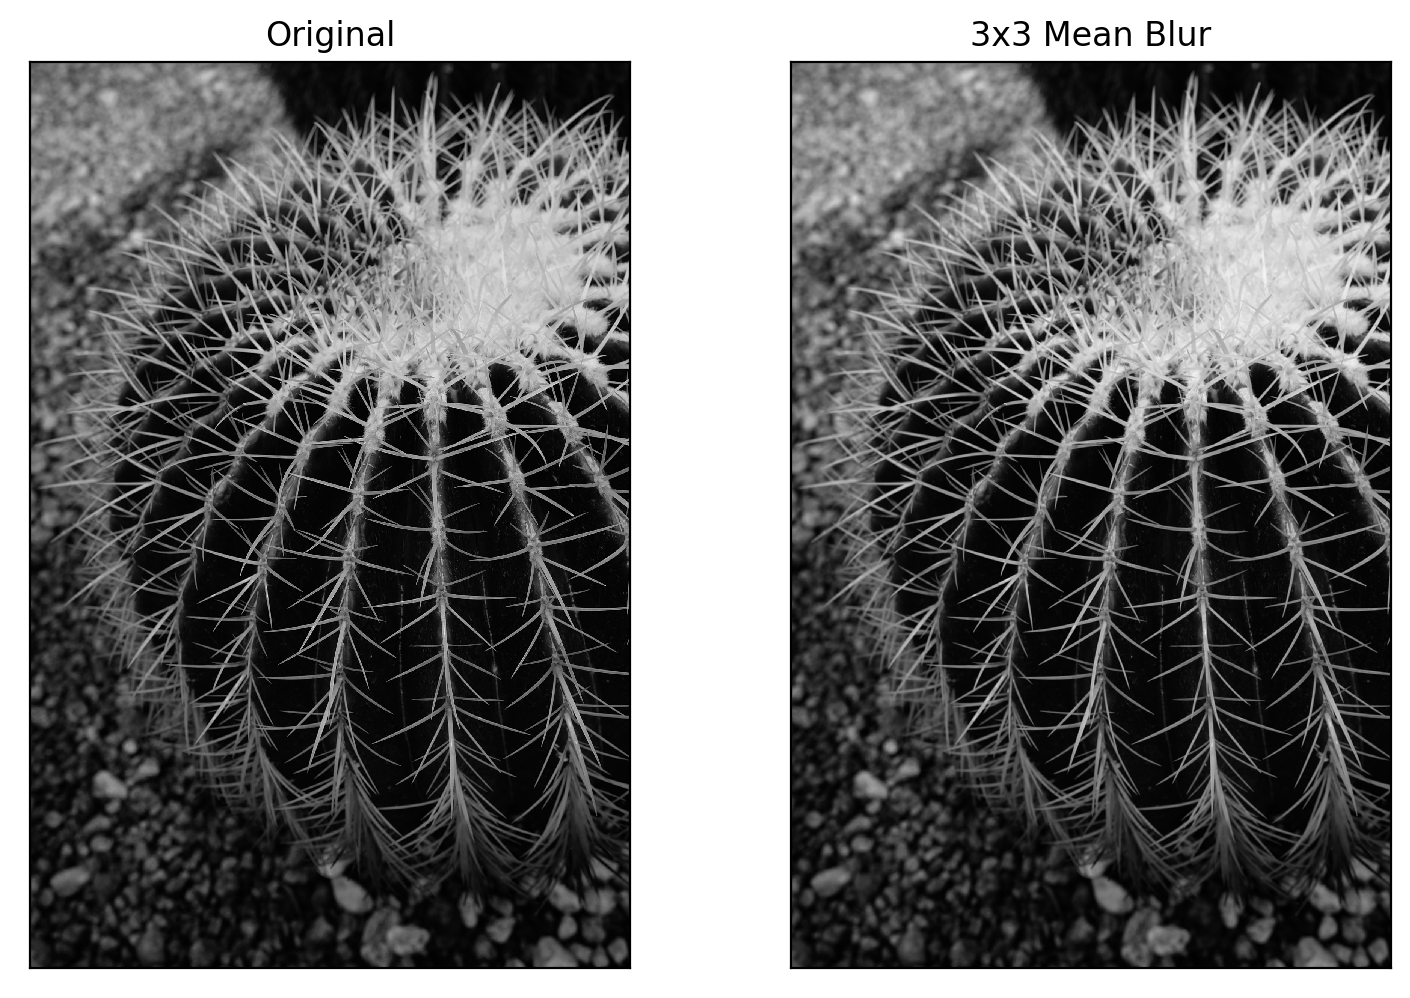

In [58]:
# plot the original image and the new blurred image using 3x3 kernel mean blur 

plt.figure(figsize=(9,6),dpi=200)
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(blurred_image3, cmap = 'gray')
plt.title('3x3 Mean Blur'), plt.xticks([]), plt.yticks([])
plt.show()

# there is very little to no difference between the original and the mean blur image
# this is beasue the kernel is very small - only 3 x 3 in size

Now adapt your code for a $n\times n$ kernel. Do you notice a difference for a larger sized kernel? Maybe try a few different sizes.

In [59]:
# function to get blurred_image array for kernel of n x n dimensions

def mean_blur(n, image_file):           # input the kernel dimension size n, and the image file name 
    
    img = plt.imread(image_file)        # read in the image file 


    kernel = np.ones((n,n),np.float32)  # create a n x n kernel of all ones 
                                        # will be used to carry out the mean blur

    means = []                          # empty list to append the calculated means to after each completed loop

    
    # want to loop through n-1 rows of the the img array to execute mean blur correctly
    # ie first row of kernel must be placed at first row and and then shifts down one row each loop
    # for the values 0-(n-1) -> must be n-1 as that is the lowest the kernel can be placed 
    # without going past the image array dimensions 
    
    for i in range(0,img.shape[0]-(n-1)): 
        
        # want to also loop through n-1 columns so the kernel is moving across the image array 
        # once it has moved through all these columns, it shifts one row down (previous for loop) and repeats process
        # for the values 0-(n-1) -> n-1 being the farthest right the kernel can be placed 
        # without exceeding img array dimensions
        
        for x in range(0,img.shape[1]-(n-1)):
        
            # mean calculation 
            # ie if n = 100
            # first loop - 0:3:(0:3,1:4,2:5...98:101)(calculates mean blur with kernel starting at very first row of img array)
            # kernel will then shift down one row - 1:4:(same as above^) - moves across img array again 
            mean = np.sum(img[i:i+n,x:x+n]*kernel)/np.sum(kernel)
            means.append(mean)  # append mean values to a list
        
    blurred = np.array(means)                               # make an array out of the list of mean values
    blurred.shape = (img.shape[0]-(n-1),img.shape[1]-(n-1)) # create the precise dimensions of new mean blur array
                       
    return blurred # return the array of mean blurred values

In [60]:
blurred_image7 = mean_blur(n = 7, image_file = 'cactus.jpg')   # 7 x 7 kernel for mean blur
blurred_image15 = mean_blur(n = 15, image_file = 'cactus.jpg') # 15 x 15 kernel for mean blur
blurred_image30 = mean_blur(n = 30, image_file = 'cactus.jpg') # 30 x 30 kernel for mean blur
blurred_image50 = mean_blur(n = 50, image_file = 'cactus.jpg') # 50 x 50 kernel for mean blur

# takes a short while to run together

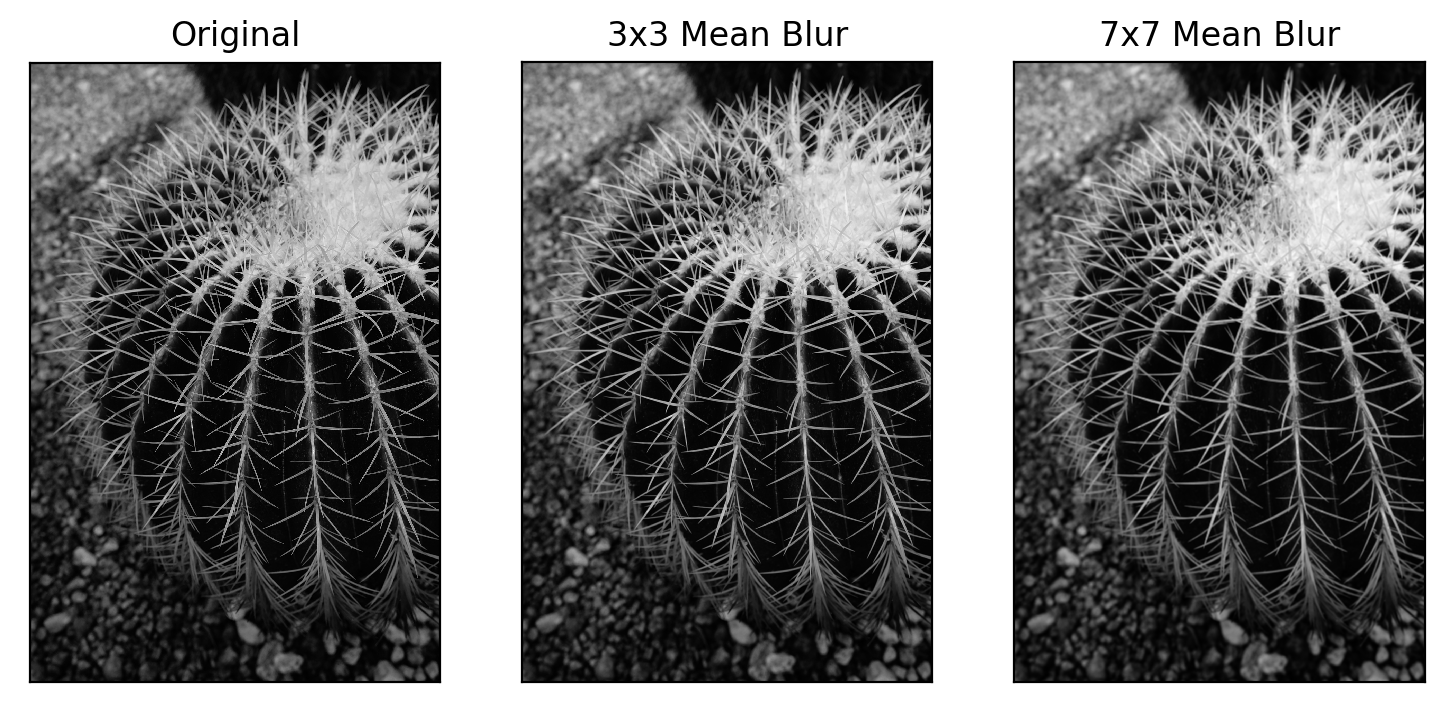

In [61]:
plt.figure(figsize=(9,6),dpi=200)

# original cactus image
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

# mean blur using 3x3 kernel
plt.subplot(1,3,2),plt.imshow(blurred_image3, cmap = 'gray')
plt.title('3x3 Mean Blur'), plt.xticks([]), plt.yticks([])

# mean blur using 7x7 kernel
plt.subplot(1,3,3),plt.imshow(blurred_image7, cmap = 'gray')
plt.title('7x7 Mean Blur'), plt.xticks([]), plt.yticks([])

plt.show()

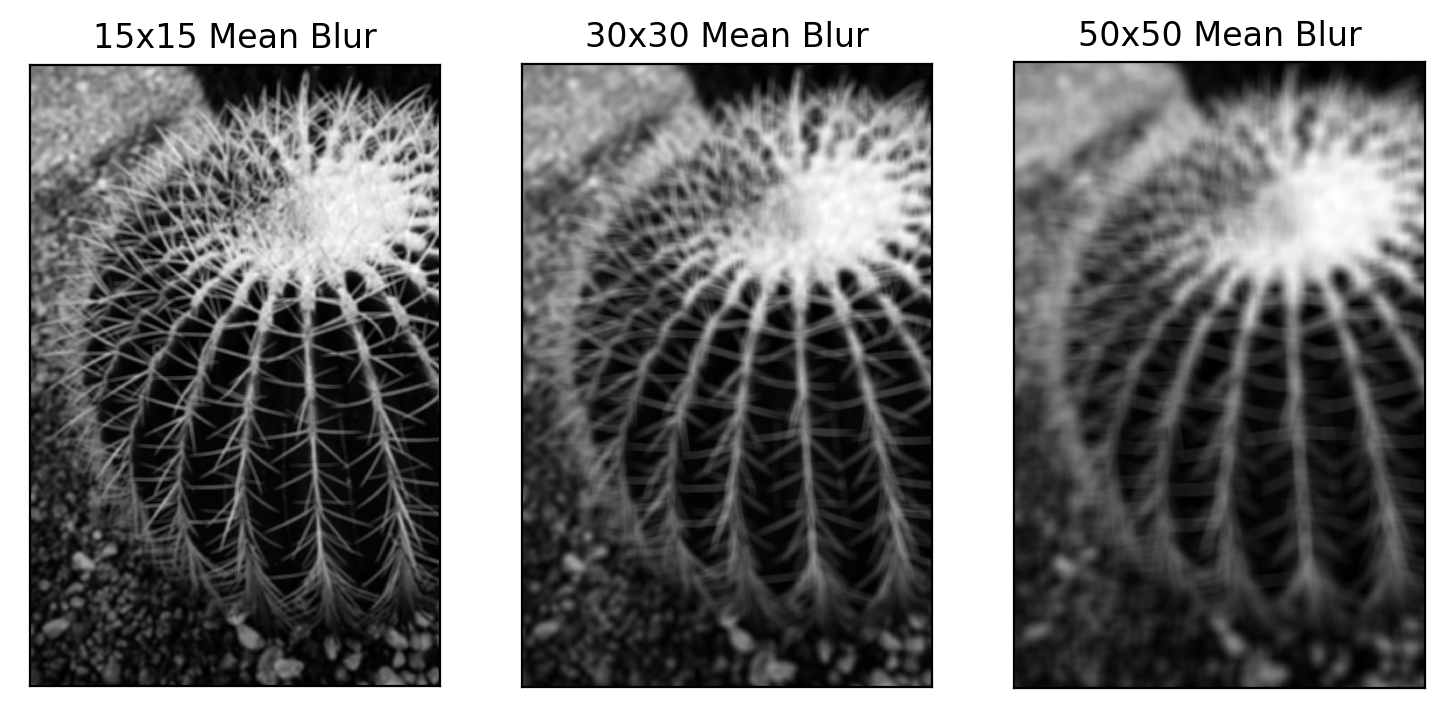

In [62]:
# trying larger kernel sizes - image blurring becomes greater as the kernel increases in size

plt.figure(figsize=(9,6),dpi=200)

# mean blur using 15x15
plt.subplot(1,3,1),plt.imshow(blurred_image15, cmap = 'gray')
plt.title('15x15 Mean Blur'), plt.xticks([]), plt.yticks([])

# mean blur using 30x30 kernel
plt.subplot(1,3,2),plt.imshow(blurred_image30, cmap = 'gray')
plt.title('30x30 Mean Blur'), plt.xticks([]), plt.yticks([])

# mean blur using 50x50 kernel
plt.subplot(1,3,3),plt.imshow(blurred_image50, cmap = 'gray')
plt.title('50x50 Mean Blur'), plt.xticks([]), plt.yticks([])

plt.show()

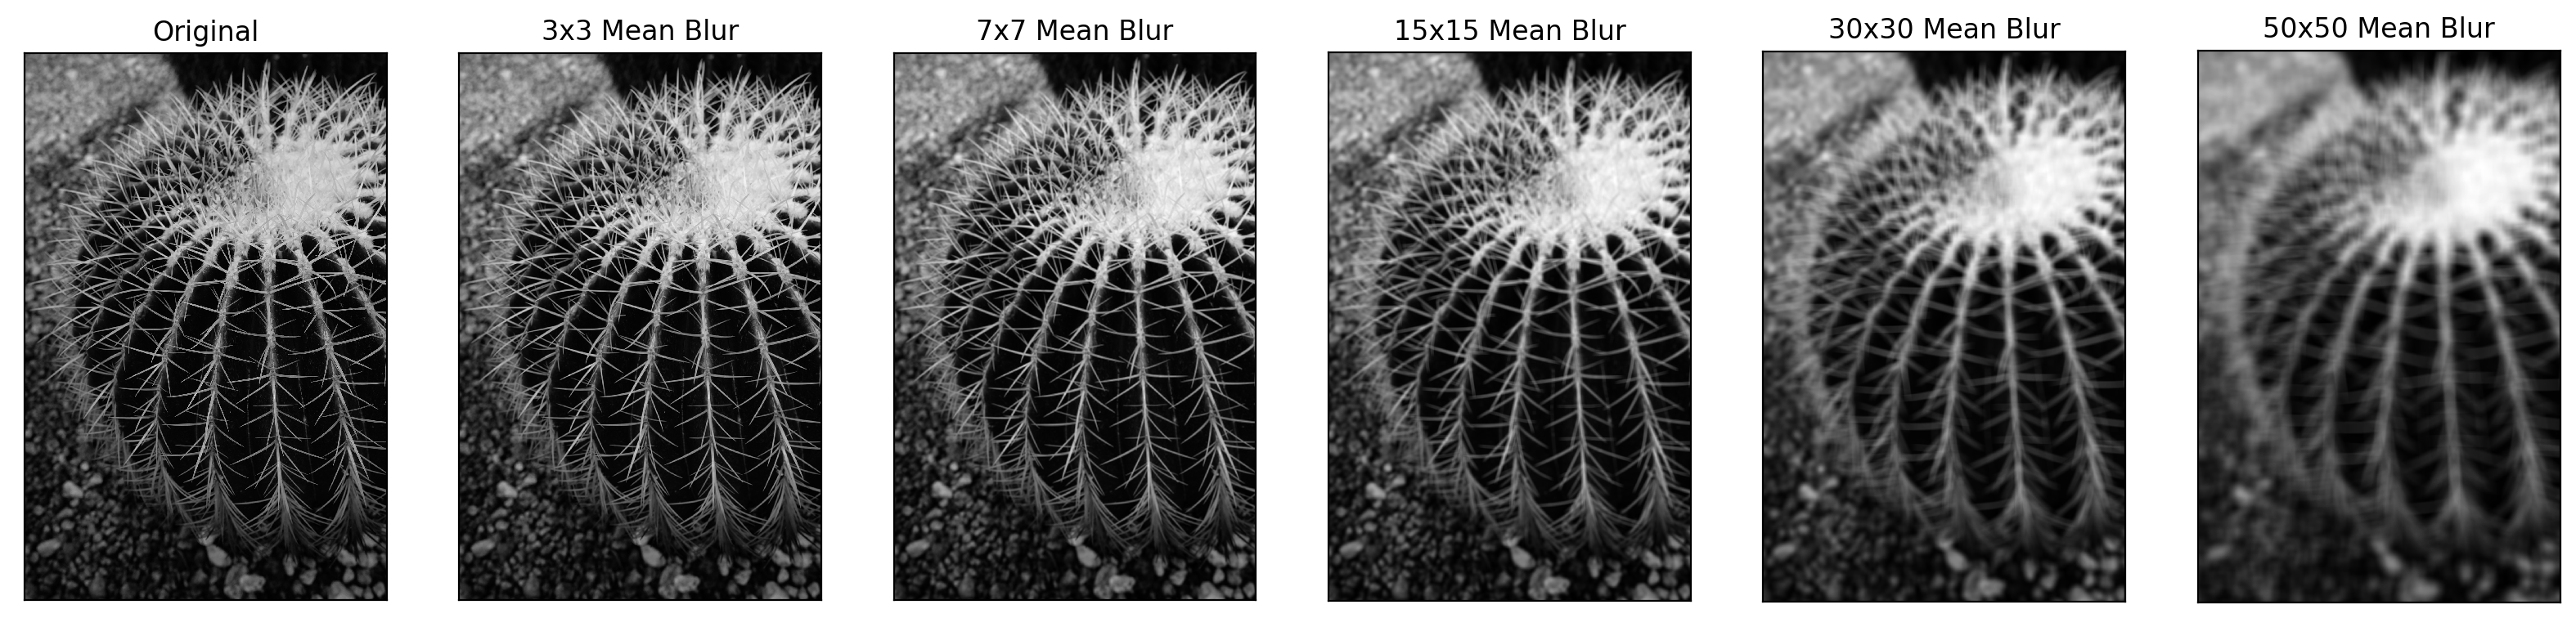

In [63]:
# all in line - can see gradual increase in the image blurring as the kernel increases in size

plt.figure(figsize=(20,10),dpi=200)

# original cactus image
plt.subplot(1,6,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

# mean blur using 3x3 kernel
plt.subplot(1,6,2),plt.imshow(blurred_image3, cmap = 'gray')
plt.title('3x3 Mean Blur'), plt.xticks([]), plt.yticks([])

# mean blur using 7x7 kernel
plt.subplot(1,6,3),plt.imshow(blurred_image7, cmap = 'gray')
plt.title('7x7 Mean Blur'), plt.xticks([]), plt.yticks([])

# mean blur using 15x15
plt.subplot(1,6,4),plt.imshow(blurred_image15, cmap = 'gray')
plt.title('15x15 Mean Blur'), plt.xticks([]), plt.yticks([])

# mean blur using 30x30 kernel
plt.subplot(1,6,5),plt.imshow(blurred_image30, cmap = 'gray')
plt.title('30x30 Mean Blur'), plt.xticks([]), plt.yticks([])

# mean blur using 50x50 kernel
plt.subplot(1,6,6),plt.imshow(blurred_image50, cmap = 'gray')
plt.title('50x50 Mean Blur'), plt.xticks([]), plt.yticks([])

plt.show()

Signed: Conor Giles-Doran

Date: 05/11/21